In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
from keras.models import load_model
from tensorflow.contrib import lite
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


# Weekly (yahoo data)

In [84]:
dataset_train = pd.read_csv('DLFtrain.csv')
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-07-01,526.599976,586.450012,526.599976,573.599976,512.192139,91750220
1,2007-07-08,574.099976,625.000000,567.000000,601.049988,536.703613,36524337
2,2007-07-15,605.700012,664.700012,602.200012,646.799988,577.555725,40045541
3,2007-07-22,648.000000,679.000000,578.000000,599.700012,535.498169,34016200
4,2007-07-29,604.900024,617.000000,579.799988,601.849976,537.417847,21357553
5,2007-08-05,560.000000,614.950012,490.000000,581.900024,519.603638,21467008
6,2007-08-12,594.000000,607.099976,565.500000,580.799988,518.621521,15151844
7,2007-08-19,592.000000,614.000000,531.150024,565.000000,504.513000,16823008
8,2007-08-26,570.049988,629.900024,570.000000,597.500000,533.533569,12652396
9,2007-09-02,598.049988,644.950012,595.000000,622.500000,555.857117,12860818


In [85]:
train_dataset = dataset_train.iloc[:, 1:2].values

In [86]:
sc = MinMaxScaler()
train_dataset_scaled = sc.fit_transform (train_dataset)
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [87]:
X_train.shape

(499, 60, 1)

In [88]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
499/499 [==============================] - 11s 22ms/step - loss: 0.0064
Epoch 2/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0028
Epoch 3/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0023
Epoch 4/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0022
Epoch 5/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 6/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 7/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0016
Epoch 8/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 9/50
499/499 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 10/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0013
Epoch 11/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0015
Epoch 12/50
499/499 [==============================] - 2s 4ms/step - loss: 0.0014
Epoch 13/50
499/499 [==

In [89]:
dataset_test = pd.read_csv('DLFtest.csv')
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-03-11,215.000000,229.699997,210.149994,226.300003,224.098465,33056022
1,2018-03-18,226.000000,227.399994,200.800003,203.000000,201.025131,30104243
2,2018-03-25,202.199997,211.550003,198.800003,201.250000,199.292160,20863655
3,2018-04-01,203.699997,208.100006,197.600006,204.350006,203.528091,35151582
4,2018-04-08,203.750000,216.050003,203.750000,210.250000,209.404343,37423507
5,2018-04-15,207.949997,219.500000,207.649994,210.750000,209.902344,29160076
6,2018-04-22,210.600006,226.149994,209.000000,222.350006,221.455688,36178103
7,2018-04-29,226.000000,226.000000,208.449997,211.300003,210.450134,16530449
8,2018-05-06,212.000000,224.300003,210.500000,214.250000,213.388260,22837010
9,2018-05-13,213.000000,214.850006,194.750000,197.300003,196.506439,26463767


In [61]:
real_values = dataset_test.iloc[:, 1:2].values

In [62]:
real_values.shape

(53, 1)

In [22]:
#real_values = np.flip(real_values,axis=0)

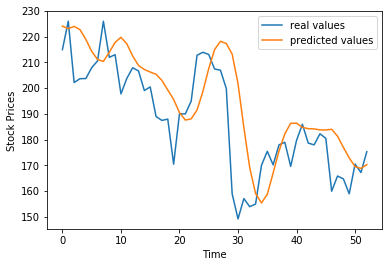

In [64]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
dataset_total = dataset_total.reshape(-1, 1)
X_test = []

for i in range(60, dataset_total.shape[0]):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

# Visualising Results
#plt.figure(figsize=((10,12)))
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [69]:
pred[51:]

array([[168.85188],
       [170.31049]], dtype=float32)

In [68]:
real_values[51:]

array([[167.25    ],
       [175.350006]])

In [70]:
pred.shape

(53, 1)

# Daily

In [101]:
dataset_train = pd.read_csv('wetransfer-ebba76/DLF Historical Data_Train.csv')
dataset_train = dataset_train.iloc[::-1]

In [102]:
train_dataset = dataset_train.iloc[:, 2:3].values

In [103]:
train_dataset_scaled = sc.fit_transform(train_dataset)
X_train = []
y_train = []

for i in range(60, train_dataset.shape[0]):
    X_train.append(train_dataset_scaled[i-60: i, 0])
    y_train.append(train_dataset_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [104]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile('adam', loss='mean_squared_error')

regressor.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
2427/2427 [==============================] - 19s 8ms/step - loss: 0.0044
Epoch 2/50
2427/2427 [==============================] - 9s 4ms/step - loss: 0.0015
Epoch 3/50
2427/2427 [==============================] - 9s 4ms/step - loss: 0.0013
Epoch 4/50
2427/2427 [==============================] - 9s 4ms/step - loss: 0.0012
Epoch 5/50
2427/2427 [==============================] - 9s 4ms/step - loss: 0.0011
Epoch 6/50
2427/2427 [==============================] - 9s 4ms/step - loss: 0.0011
Epoch 7/50
2427/2427 [==============================] - 10s 4ms/step - loss: 9.9634e-04
Epoch 8/50
2427/2427 [==============================] - 10s 4ms/step - loss: 9.6393e-04
Epoch 9/50
2427/2427 [==============================] - 10s 4ms/step - loss: 8.3619e-04
Epoch 10/50
2427/2427 [==============================] - 9s 4ms/step - loss: 8.5601e-04
Epoch 11/50
2427/2427 [==============================] - 8s 3ms/step - loss: 8.3166e-04
Epoch 12/50
2427/2427 [==============================] - 8s 3

In [123]:
dataset_test = pd.read_csv('wetransfer-ebba76/DLF Historical Data_Test (copy).csv')
dataset_test = dataset_test.iloc[::-1]

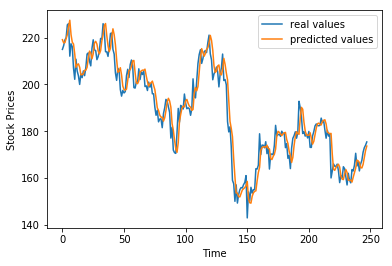

In [124]:
real_values = dataset_test.iloc[:, 2:3].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
dataset_total = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
dataset_total = dataset_total.reshape(-1, 1)
X_test = []

for i in range(60, dataset_total.shape[0]):
    X_test.append(dataset_total[i-60: i, 0])

X_test = np.array(X_test)

X_test = sc.transform(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred = regressor.predict(X_test)

pred = sc.inverse_transform(pred)

# Visualising Results
plt.plot(real_values, label = 'real values')
plt.plot(pred, label = 'predicted values')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [125]:
real_values.shape

(248, 1)

In [126]:
today = real_values[real_values.shape[0]-60:]

In [127]:
today = sc.transform(today)

In [128]:
today = today.reshape(-1,60,1)

In [129]:
today_pred = regressor.predict(today)

In [130]:
today_pred = sc.inverse_transform(today_pred)

#### Real Value (OPEN) for march, 11,2019


In [131]:
real_values[-1]

array([175.4])

#### Predicted trend using 11th march and 12th march

In [132]:
pred[-1]

array([173.63974], dtype=float32)

In [133]:
today_pred

array([[174.94547]], dtype=float32)

### Hence stock price should increase

### Candlestick graph

In [141]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from datetime import datetime

In [142]:
plotly.tools.set_credentials_file(username='gopesh97', api_key='JF3slZjgxlPUTjS2v0VO')

In [143]:
df = dataset_test
trace = go.Ohlc(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Price'])
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gopesh97/0 or inside your plot.ly account where it is named 'simple_candlestick'


/home/gopesh/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [145]:
trace= go.Ohlc(x=df['Date'],
              open = pred)
data = [trace]
py.iplot(data, filename='simple_candlestick')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~gopesh97/0 or inside your plot.ly account where it is named 'simple_candlestick'


/home/gopesh/.local/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

